<a href="https://colab.research.google.com/github/Kevan123/PwC/blob/main/PWC_Assessment_Dec2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION**  
Using python, R or any programming language of your choice complete the following:

1) An open/high/low/close  (OHLC chart) showing yearly historical prices and simple moving averages (10,20 and 50 day) of the 3 stock prices over a 3 year time frame of your choice;

2) Calculate and plot the pearson's correlation coefficient of the three (3) stocks. The correlation should be plotted on a seaborn heatmap.

**SOLUTION**  
1) A combination of pandas and plotly packages will be used to create the chart for the OHLC chart. The period used was between 2010 and 2013.
An additional master amalgamated dataframe will be created to visualize the output on a single chart.

The rolling averages will be based on the 'Close' price of the stock since to go through each indivudual OHLC will be to clustered on a single chart. The 'Close' metric also gives the closing price of a stock on a given day.

In [ ]:
#Import Packages
import pandas as pd
import plotly.graph_objects as go
from functools import reduce
import scipy.stats
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sb

In [ ]:
#Read in text files and add a column indicating which file the data belongs to
df1 = pd.read_csv('aaww.us.txt', sep=",")
df1.insert(0,'name','aaww')
df2 = pd.read_csv('alxn.us.txt', sep=",")
df2.insert(0,'name','alxn')
df3 = pd.read_csv('dbb.us.txt', sep=",")
df3.insert(0,'name','dbb')

In [ ]:
#selecting 3 year period between 2010 to 2013
start_date = '2010-01-01'
end_date = '2013-01-01'

mask1 = (df1['Date'] >= start_date) & (df1['Date'] <= end_date)
mask2 = (df2['Date'] >= start_date) & (df2['Date'] <= end_date)
mask3 = (df3['Date'] >= start_date) & (df3['Date'] <= end_date)

df1 = df1.loc[mask1]
df2 = df2.loc[mask2]
df3 = df3.loc[mask3]

In [ ]:
df1.head(10)

,name,Date,Open,High,Low,Close,Volume,OpenInt
1183,aaww,2010-01-04,37.98,38.66,37.07,38.20,607417,0
1184,aaww,2010-01-05,38.48,40.61,38.05,40.31,426905,0
1185,aaww,2010-01-06,40.22,40.22,38.42,38.63,293578,0
1186,aaww,2010-01-07,38.66,39.26,38.26,38.95,170149,0
1187,aaww,2010-01-08,38.96,40.00,38.96,39.27,251643,0
1188,aaww,2010-01-11,39.61,39.68,39.00,39.39,237159,0
1189,aaww,2010-01-12,39.03,39.46,38.49,39.35,165017,0
1190,aaww,2010-01-13,41.13,42.08,39.54,40.14,455899,0
1191,aaww,2010-01-14,40.04,40.59,39.85,40.30,214472,0
1192,aaww,2010-01-15,40.44,40.44,38.50,39.42,254292,0


In [ ]:
print(len(df1),len(df2),len(df3))

753 753 753


In [ ]:
#create master dataframe

df = pd.concat([df1,df2,df3])
df.head(5)

,name,Date,Open,High,Low,Close,Volume,OpenInt
1183,aaww,2010-01-04,37.98,38.66,37.07,38.20,607417,0
1184,aaww,2010-01-05,38.48,40.61,38.05,40.31,426905,0
1185,aaww,2010-01-06,40.22,40.22,38.42,38.63,293578,0
1186,aaww,2010-01-07,38.66,39.26,38.26,38.95,170149,0
1187,aaww,2010-01-08,38.96,40.00,38.96,39.27,251643,0


In [ ]:
df1['MA10'] = df1.Close.rolling(10).mean()
df1['MA20'] = df1.Close.rolling(20).mean()
df1['MA50'] = df1.Close.rolling(50).mean()

In [ ]:
#create OHLC for DF1 (AAWW) chart
fig1 = go.Figure(data=[go.Ohlc(x=df1['Date'],
                    open=df1['Open'],
                    high=df1['High'],
                    low=df1['Low'],
                    close=df1['Close'], name = 'AAWW'),
                    go.Scatter(x=df1.Date, y=df1.MA10, line=dict(color='orange', width=1), name='MA10'),
                    go.Scatter(x=df1.Date, y=df1.MA20, line=dict(color='green', width=1), name='MA20'),
                    go.Scatter(x=df1.Date, y=df1.MA50, line=dict(color='yellow', width=1), name='MA50')])
fig1.show()

In [ ]:
df2['MA10'] = df2.Close.rolling(10).mean()
df2['MA20'] = df2.Close.rolling(20).mean()
df2['MA50'] = df2.Close.rolling(50).mean()

In [ ]:
#create OHLC for DF2 (ALXN) chart
fig2 = go.Figure(data=[go.Ohlc(x=df2['Date'],
                    open=df2['Open'],
                    high=df2['High'],
                    low=df2['Low'],
                    close=df2['Close'], name = 'ALXN'),
                    go.Scatter(x=df2.Date, y=df2.MA10, line=dict(color='orange', width=1), name='MA10'),
                    go.Scatter(x=df2.Date, y=df2.MA20, line=dict(color='green', width=1), name='MA20'),
                    go.Scatter(x=df2.Date, y=df2.MA50, line=dict(color='yellow', width=1), name='MA50')])
fig2.show()

In [ ]:
df3['MA10'] = df3.Close.rolling(10).mean()
df3['MA20'] = df3.Close.rolling(20).mean()
df3['MA50'] = df3.Close.rolling(50).mean()

In [ ]:
#create OHLC for DF3 (DBB) chart
fig3 = go.Figure(data=[go.Ohlc(x=df3['Date'],
                    open=df3['Open'],
                    high=df3['High'],
                    low=df3['Low'],
                    close=df3['Close'], name = 'DBB'),
                    go.Scatter(x=df3.Date, y=df3.MA10, line=dict(color='orange', width=1.5), name='MA10'),
                    go.Scatter(x=df3.Date, y=df3.MA20, line=dict(color='green', width=1.5), name='MA20'),
                    go.Scatter(x=df3.Date, y=df3.MA50, line=dict(color='yellow', width=1.5), name='MA50')])
fig3.show()

In [ ]:
#create OHLC for all the various stocks on a single chart
fig = go.Figure(data=go.Ohlc(x=df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
                    
fig.show()

2) To determine the Pearson's Correlation Coefficient, we will first examine what it is. 

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It's a common tool for describing simple relationships without making a statement about cause and effect.

The correlation coefficient is the specific measure that quantifies the strength of the linear relationship between two variables in a correlation analysis. 

Thus for this caclulation we will create a dataset where we will examine the relationship between the different OHLC for the three stocks.

The analysis was done from a first principle basis as well to confirm the results of the correlation matrix produced in the Seaborn plot.   
It should be noted that this correlation matrix produced is symmetric.


From the results below, there seems to be 
- a relative strong positive linear relationship between AAWW and DBB  
- a relatively weak negative relationships between AAWW and ALXN  
- a relative strong negative linear relationship between ALXN and DBB

In [ ]:
sub_df1 = df1.iloc[:, 1:6]
sub_df2 = df2.iloc[:, 1:6]
sub_df3 = df3.iloc[:, 1:6]

sub_df = [sub_df1,sub_df2,sub_df3]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
                                            how='outer'), sub_df)

df_merged = df_merged.rename(columns={'Open_x': 'Open_aaww', "High_x": "High_aaww", "Low_x":"Low_aaww", "Close_x":"Close_aaww",
                   "Open_y": "Open_alxn", "High_y": "High_alxn", "Low_y":"Low_alxn", "Close_y":"Close_alxn",
                   "Open": "Open_dbb", "High": "High_dbb", "Low":"Low_dbb", "Close":"Close_dbb"})

df_merged.head(10)

,Date,Open_aaww,High_aaww,Low_aaww,Close_aaww,Open_alxn,High_alxn,Low_alxn,Close_alxn,Open_dbb,High_dbb,Low_dbb,Close_dbb
0,2010-01-04,37.98,38.66,37.07,38.20,24.505,24.785,23.935,24.125,22.99,23.00,22.72,22.92
1,2010-01-05,38.48,40.61,38.05,40.31,24.245,24.250,23.625,23.780,22.86,23.09,22.76,23.08
2,2010-01-06,40.22,40.22,38.42,38.63,23.865,24.050,23.755,23.840,23.47,23.94,23.42,23.80
3,2010-01-07,38.66,39.26,38.26,38.95,23.940,23.950,23.650,23.930,23.55,23.55,23.04,23.12
4,2010-01-08,38.96,40.00,38.96,39.27,23.830,24.025,23.760,23.975,23.12,23.12,22.63,22.94
5,2010-01-11,39.61,39.68,39.00,39.39,23.915,24.000,23.675,23.830,23.27,23.30,23.01,23.16
6,2010-01-12,39.03,39.46,38.49,39.35,23.705,23.705,23.455,23.500,22.61,22.72,22.10,22.18
7,2010-01-13,41.13,42.08,39.54,40.14,23.475,23.635,23.465,23.570,22.54,22.81,22.39,22.81
8,2010-01-14,40.04,40.59,39.85,40.30,23.635,24.015,23.460,23.835,23.00,23.15,22.73,22.82
9,2010-01-15,40.44,40.44,38.50,39.42,23.965,24.125,23.510,23.705,22.65,22.65,22.38,22.51


In [ ]:
#Pearson's Correlation Coefficient
scipy.stats.pearsonr(df_merged['Close_aaww'],df_merged['Close_alxn'])

(-0.2435647804180387, 1.2457488770393013e-11)

In [ ]:
scipy.stats.pearsonr(df_merged['Close_aaww'],df_merged['Close_dbb'])

(0.6159036427037816, 7.777143345385881e-80)

In [ ]:
scipy.stats.pearsonr(df_merged['Close_alxn'],df_merged['Close_dbb'])

(-0.48985034308666225, 1.0656527872017442e-46)

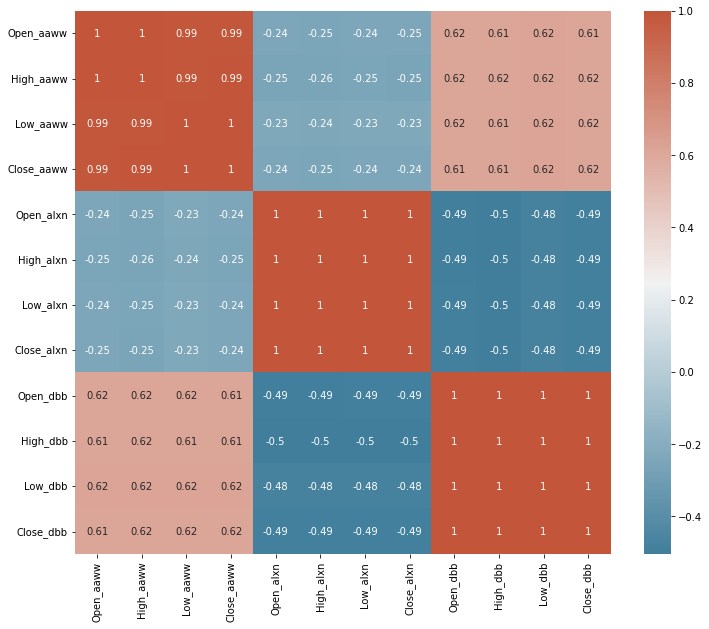

In [ ]:
# Correlation between different variables
corr = df_merged.corr()

# Set up the matplotlib plot configuration
f, ax = mp.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sb.heatmap(corr, annot=True, cmap=cmap)